In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()


11501568/11490434 [==============================] - 0s 0us/step


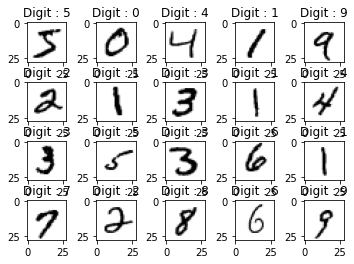

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('on')

In [5]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)
print('How image looks like : ')
print(train_img[0])

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)
How image looks like : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  

Text(0.5, 0, 'I')

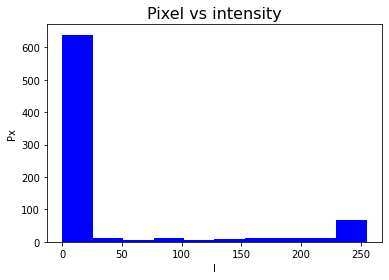

In [6]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('Pixel vs intensity',fontsize=16)
plt.ylabel('Px')
plt.xlabel('I')

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
print('How image looks like after normalising: ')
print(train_img[0])

How image looks like after normalising: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

Text(0.5, 0, 'Intensity')

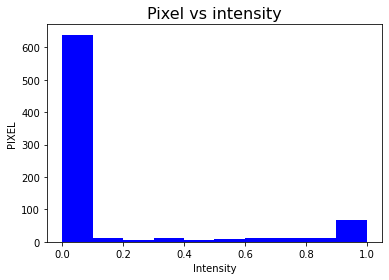

In [9]:
plt.hist(train_img[0].reshape(784),facecolor='blue')
plt.title('Pixel vs intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [10]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [11]:
#compiling the sequential model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 27s 7ms/step - loss: 0.3150 - accuracy: 0.9045
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0771 - accuracy: 0.9756
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0373 - accuracy: 0.9874
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0319 - accuracy: 0.9893
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 8/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 9/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 10/100
1875/1875 [==============================] - 13s 7m

In [40]:
model.save('project.h5')

In [13]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.5106 - accuracy: 0.9830
Test Loss 0.5105721950531006
Test Accuracy 0.9829999804496765


Predicted Value:  7
Successful prediction


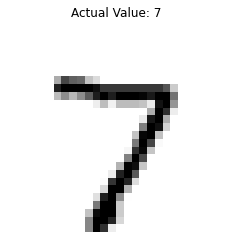

In [15]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Failed prediction')

Predicted Value:  4
Successful prediction


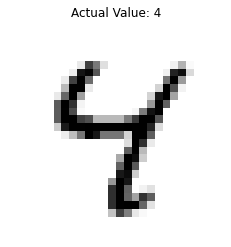

In [21]:
plt.imshow(test_img[6],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[6]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[6]))
if(test_lab[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [33]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [43]:
from google.colab import files
uploaded = files.upload()

Saving download (1).jpeg to download (1).jpeg


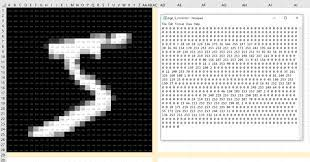

In [49]:
from IPython.display import Image
Image('download (1).jpeg',width=250,height=250)

In [47]:
img = load_image('download (1).jpeg')
digit=model.predict(img)
print('Predicted value : ',np.argmax(digit))

Predicted value :  5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
model=tf.keras.models.load_model('project1.h5')